# WeatherPy
----

### Analysis
1.	There is a relatively strong correlation between latitude and temperature. The lower latitudes have higher temperatures and the higher latitudes have lower temperatures.
2.	The correlation between humidity and latitude is very weak.
3.	There is almost no correlation between cloudiness and latitude.
4.	The correlation between latitude and wind speed is very weak.

---

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

662

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
cities_pd = pd.DataFrame()

cities_pd['City'] = ""
cities_pd['Cloudiness'] = ""
cities_pd['Country'] = ""
cities_pd['Date'] = ""
cities_pd['Humidity'] = ""
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Max Temp'] = ""
cities_pd['Wind Speed'] = ""


url = "http://api.openweathermap.org/data/2.5/weather?" + "units=Imperial" + "&appid=" + api_key 

print("Beginning Data Retrieval")
print("-----------------------------")
n=50
j=1
s=1
for i in range(0, len(cities)):
    query_url = url+ "&q=" + cities[i] 
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        cities_pd.loc[i,'Cloudiness'] =weather_json['clouds']['all']
        cities_pd.loc[i,'Country'] = weather_json['sys']['country']
        cities_pd.loc[i,'Date'] = weather_json['dt']
        cities_pd.loc[i,'Humidity'] = weather_json['main']['humidity']
        cities_pd.loc[i,'Lat'] = weather_json['coord']['lat']
        cities_pd.loc[i,'Lng'] = weather_json['coord']['lon']
        cities_pd.loc[i,'Max Temp'] =weather_json['main']['temp_max']
        cities_pd.loc[i,'Wind Speed'] = weather_json['wind']['speed']
        cities_pd.loc[i, 'City'] = cities[i] 
        print(f"Processing Record {j} of Set {s} | {cities[i]}")
        if j % n==0:
            s=s+1
            j=0
        if s==14:
            #Only 13 groups each 50 cities
            break
        j+=1
    except (KeyError, IndexError):
        print("City not found. Skipping... ")
    
print("-----------------------------")
print("Data Retrieval Complete ")    
print("-----------------------------")

cities_pd.count()

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | berlevag
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | cap-aux-meules
City not found. Skipping... 
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | englewood
Processing Record 10 of Set 1 | whitecourt
Processing Record 11 of Set 1 | madison
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | taltal
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | alindao
City not found. Skipping... 
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | cabedelo
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | ingham
Processing Record 20 of Set 1 | saldanha
City not found. Skipping... 
Processing Record 21 of Set 1 | t

Processing Record 32 of Set 4 | polunochnoye
City not found. Skipping... 
Processing Record 33 of Set 4 | faanui
Processing Record 34 of Set 4 | katherine
Processing Record 35 of Set 4 | portland
Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | sao joao da barra
Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | chicama
Processing Record 40 of Set 4 | pochutla
Processing Record 41 of Set 4 | susehri
Processing Record 42 of Set 4 | kangaatsiaq
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | grindavik
Processing Record 45 of Set 4 | sechura
Processing Record 46 of Set 4 | hualmay
Processing Record 47 of Set 4 | jalu
Processing Record 48 of Set 4 | san quintin
Processing Record 49 of Set 4 | fjerritslev
Processing Record 50 of Set 4 | coquimbo
Processing Record 1 of Set 5 | visby
Processing Record 2 of Set 5 | kieta
Processing Record 3 of Set 5 | tiksi
City not found. Skipping... 
Processing Record 4 of Set 5

Processing Record 19 of Set 8 | xuanwu
Processing Record 20 of Set 8 | markova
Processing Record 21 of Set 8 | zabol
Processing Record 22 of Set 8 | kailua
Processing Record 23 of Set 8 | port jervis
Processing Record 24 of Set 8 | north bend
Processing Record 25 of Set 8 | mwene-ditu
Processing Record 26 of Set 8 | nishihara
Processing Record 27 of Set 8 | vilela
Processing Record 28 of Set 8 | aba
Processing Record 29 of Set 8 | shahr-e babak
Processing Record 30 of Set 8 | birjand
Processing Record 31 of Set 8 | ilukste
Processing Record 32 of Set 8 | paithan
Processing Record 33 of Set 8 | ovre ardal
Processing Record 34 of Set 8 | nadym
Processing Record 35 of Set 8 | aquidauana
Processing Record 36 of Set 8 | san luis
Processing Record 37 of Set 8 | viedma
Processing Record 38 of Set 8 | burns lake
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | novoorsk
Processing Record 41 of Set 8 | lat yao
Processing Record 42 of Set 8 | ishigaki
Processing Record 43 

Processing Record 7 of Set 12 | maldonado
Processing Record 8 of Set 12 | hasaki
Processing Record 9 of Set 12 | lavrentiya
Processing Record 10 of Set 12 | arlit
City not found. Skipping... 
Processing Record 11 of Set 12 | vanderhoof
Processing Record 12 of Set 12 | rongcheng
Processing Record 13 of Set 12 | geraldton
Processing Record 14 of Set 12 | inirida
Processing Record 15 of Set 12 | solnechnyy
Processing Record 16 of Set 12 | batagay
Processing Record 17 of Set 12 | conde
Processing Record 18 of Set 12 | pinar del rio
Processing Record 19 of Set 12 | sisimiut
Processing Record 20 of Set 12 | buchanan
Processing Record 21 of Set 12 | piuma
Processing Record 22 of Set 12 | kimbe
Processing Record 23 of Set 12 | northallerton
Processing Record 24 of Set 12 | san rafael
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | ruteng
Processing Record 27 of Set 12 | holme
Processing Record 28 of Set 12 | yining
Processing Record 29 of Set 12 | sosnovo-ozerskoye


City          603
Cloudiness    603
Country       603
Date          603
Humidity      603
Lat           603
Lng           603
Max Temp      603
Wind Speed    603
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
cities_pd.to_csv(output_data_file, encoding='utf-8', index=False)

In [9]:
cities_pd=pd.read_csv(output_data_file)
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,berlevag,48,NO,1547431627,100,70.86,29.09,14.68,3.51
1,thompson,5,CA,1547427600,84,55.74,-97.86,5.00,6.93
2,arraial do cabo,0,BR,1547431565,87,-22.97,-42.02,76.42,14.14
3,barrow,92,AR,1547431628,97,-38.31,-60.23,64.09,10.16
4,qaanaaq,0,GL,1547431435,100,77.48,-69.36,-25.19,11.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

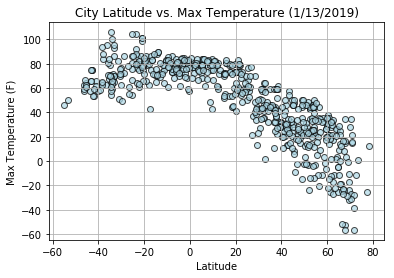

In [27]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Max Temp"], marker="o",facecolors="lightblue",alpha=0.7, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (1/13/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Temperature Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

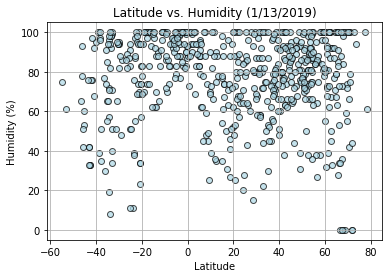

In [28]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Humidity"], marker="o",facecolors="lightblue",alpha=0.7, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (1/13/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

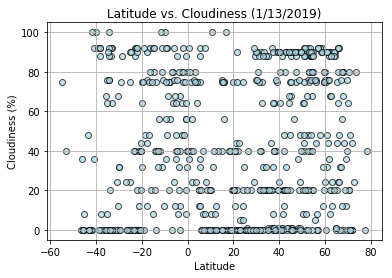

In [29]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Cloudiness"], marker="o",facecolors="lightblue",alpha=0.7, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (1/13/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

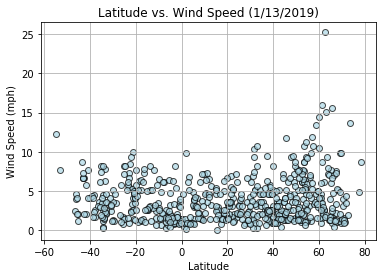

In [22]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Wind Speed"], marker="o",facecolors="lightblue",alpha=0.7, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (1/13/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude vs. Wind Speed Plot.png")

# Show plot
plt.show()

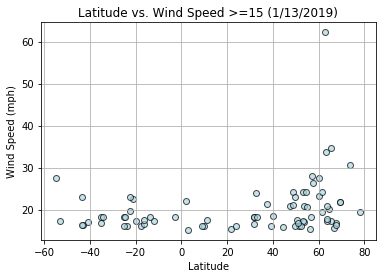

In [31]:
# Build a scatter plot for each data type
cities_pd_wind_15=cities_pd[cities_pd['Wind Speed']>=15]

plt.scatter(cities_pd_wind_15["Lat"], cities_pd_wind_15["Wind Speed"], marker="o",facecolors="lightblue",alpha=0.7, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed >=15 (1/13/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude vs. Wind Speed 15 Plot.png")

# Show plot
plt.show()